# Spotify Music Recommendation System

In [1]:
#Import Requried Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv(r"C:\Users\jigne\OneDrive\Desktop\Spotify\dataset.csv")

In [3]:
data = data.iloc[:14000,1:]

In [4]:
data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          14000 non-null  object 
 1   artists           14000 non-null  object 
 2   album_name        14000 non-null  object 
 3   track_name        14000 non-null  object 
 4   popularity        14000 non-null  int64  
 5   duration_ms       14000 non-null  int64  
 6   explicit          14000 non-null  bool   
 7   danceability      14000 non-null  float64
 8   energy            14000 non-null  float64
 9   key               14000 non-null  int64  
 10  loudness          14000 non-null  float64
 11  mode              14000 non-null  int64  
 12  speechiness       14000 non-null  float64
 13  acousticness      14000 non-null  float64
 14  instrumentalness  14000 non-null  float64
 15  liveness          14000 non-null  float64
 16  valence           14000 non-null  float6

In [6]:
data.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,14000.000000,1.400000e+04,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.00000,14000.000000
mean,32.365071,2.526280e+05,0.545935,0.620482,5.401143,-8.856311,0.647500,0.065631,0.321233,0.216647,0.197067,0.466689,122.39119,3.900929
std,21.527877,1.399518e+05,0.175854,0.260130,3.569233,5.077315,0.477766,0.063519,0.340506,0.346980,0.174027,0.264376,28.79930,0.403002
min,0.000000,2.226600e+04,0.000000,0.001440,0.000000,-41.808000,0.000000,0.000000,0.000000,0.000000,0.011600,0.000000,0.00000,0.000000
25%,16.000000,1.891165e+05,0.433000,0.430000,2.000000,-10.634000,0.000000,0.033400,0.009288,0.000000,0.095300,0.243000,100.71900,4.000000
50%,31.000000,2.333500e+05,0.559000,0.658000,6.000000,-7.660500,1.000000,0.043500,0.176000,0.000616,0.124000,0.448000,123.02200,4.000000
75%,49.000000,2.874760e+05,0.673250,0.849000,9.000000,-5.579000,1.000000,0.067700,0.629000,0.380000,0.248000,0.681000,139.92275,4.000000
max,93.000000,4.789026e+06,0.981000,1.000000,11.000000,0.698000,1.000000,0.924000,0.996000,0.995000,0.995000,0.995000,243.37200,5.000000


In [7]:
data.isna().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [8]:
data.drop_duplicates()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.03220,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.92400,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.21000,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.90500,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.46900,0.000000,0.0829,0.167,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,3x8pMkDfcUYtCEHnpLBbad,Mr. Fingers;Call Super,Praise to the Vibes / Crying Over You (Remixes),Crying Over You - Call Super Remix,6,366916,False,0.781,0.5450,2,-9.955,1,0.0474,0.01590,0.826000,0.0918,0.564,110.021,4,chicago-house
13996,5YITLGrLwB4h0rtEpjWQjt,Glenn Underground,The Jerusalem EP's,There Is A Time - Glenn's Favourite Mix,6,388693,False,0.796,0.6060,7,-14.969,1,0.0518,0.00398,0.091900,0.0490,0.531,121.895,4,chicago-house
13997,2lfx77i1ktk6Ll0b9pYj6q,Ron Trent,What Do the Stars Say to You (François Kevorki...,WARM - Mixed,5,268392,False,0.639,0.4150,2,-7.337,1,0.0879,0.00157,0.383000,0.1050,0.531,169.964,4,chicago-house
13998,1pWJVu2PIl4tGBrJnr6YfK,Ralphi Rosario;Linda Clifford;Dr Packer;lego,Dr Packer's Different Strokes,Wanna Give It Up - Dr Packer's Légo's Dub Remix,5,393125,False,0.842,0.6710,10,-5.665,0,0.0759,0.00115,0.672000,0.0259,0.676,124.005,4,chicago-house


In [9]:
data.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [10]:
correlation_matrix = data.corr()

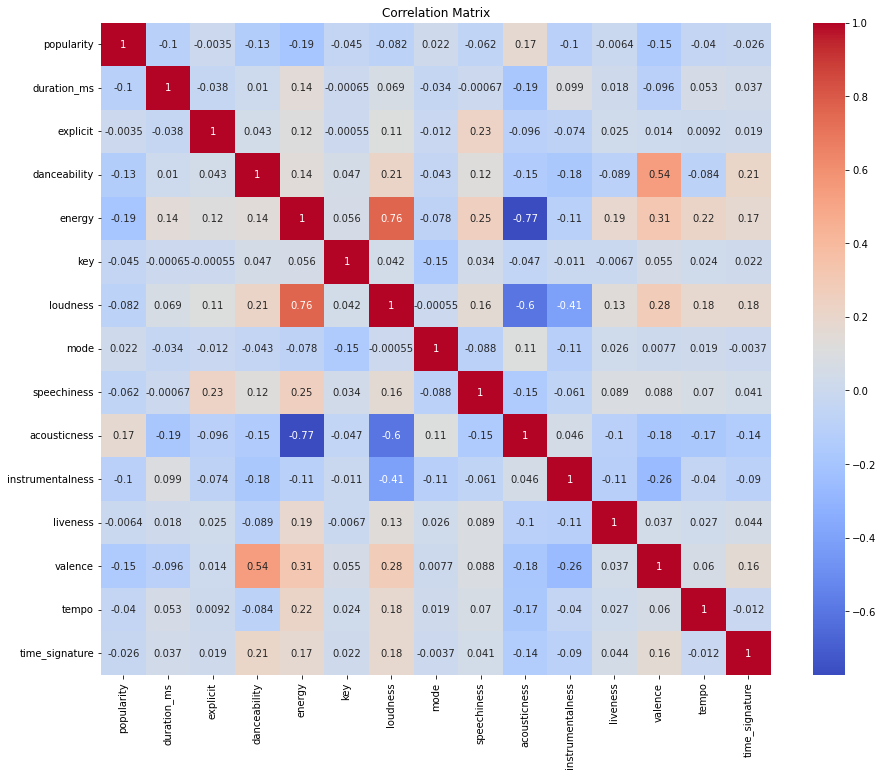

In [11]:
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
#Top 5 Artist
popular_artists = data.groupby("artists").count().sort_values(by='popularity', ascending=False)['popularity'][:5]
popular_artists

artists
my little airport        171
The Beatles              127
Ella Fitzgerald          112
The Chemical Brothers     74
Criolo                    64
Name: popularity, dtype: int64

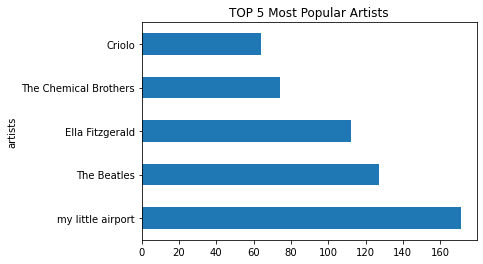

In [13]:
popular_artists.plot.barh()
plt.title("TOP 5 Most Popular Artists")
plt.show()

In [14]:
#Top 5 long songs
long_songs = data[["track_name", "duration_ms"]].sort_values(by="duration_ms", ascending=False)[:5]
long_songs

,track_name,duration_ms
10935,Crossing Wires 002 - Continuous DJ Mix,4789026
10984,Crossing Wires 002 - Continuous DJ Mix,4789026
13344,House of Om - Mark Farina - Continuous Mix,4447520
13245,Live In Tokyo - Continuous Mix,4339826
13195,Greenhouse Construction,4334721


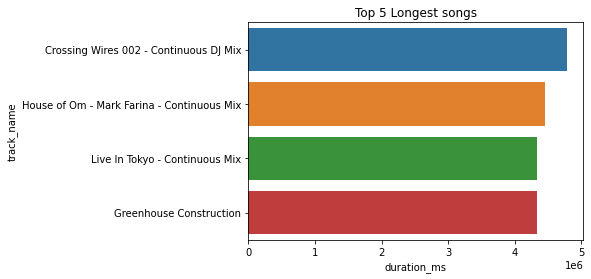

In [15]:
sns.barplot(x="duration_ms", y="track_name", data= long_songs)
plt.title("Top 5 Longest songs")
plt.show()

In [16]:
#Top 5 Trending
trend_genre = data[["track_genre", "popularity"]].sort_values(by="popularity", ascending=False)[:5]
trend_genre

,track_genre,popularity
2003,alt-rock,93
3003,alternative,93
2000,alt-rock,87
11014,british,87
3300,alternative,87


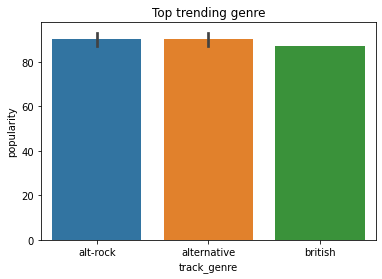

In [17]:
sns.barplot(x="track_genre",y="popularity", data=trend_genre)
plt.title("Top trending genre")
plt.show()

In [18]:
danceable = data[["track_name", "artists", "danceability"]].sort_values(by="danceability", ascending=False)[:5]
danceable

,track_name,artists,danceability
13353,Bitches,dj funk,0.981
13145,Plastik Fantastik,Felix Da Housecat,0.980
13039,The Underground - Hatiras Remix,DJ Pierre;My Digital Enemy;Hatiras,0.979
13168,Most Wanted,Fast Eddie,0.976
8891,Sothern Soul Party Mood,Karen Wolfe,0.975


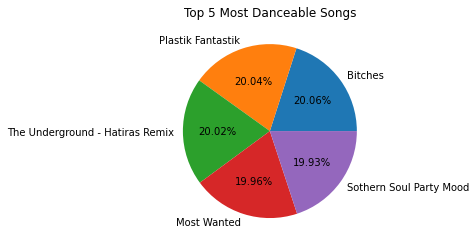

In [19]:
plt.pie(x="danceability", data=danceable, autopct='%1.2f%%', labels=danceable.track_name)
plt.title("Top 5 Most Danceable Songs")
plt.show()

In [20]:
data.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,14000.000000,1.400000e+04,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.00000,14000.000000
mean,32.365071,2.526280e+05,0.545935,0.620482,5.401143,-8.856311,0.647500,0.065631,0.321233,0.216647,0.197067,0.466689,122.39119,3.900929
std,21.527877,1.399518e+05,0.175854,0.260130,3.569233,5.077315,0.477766,0.063519,0.340506,0.346980,0.174027,0.264376,28.79930,0.403002
min,0.000000,2.226600e+04,0.000000,0.001440,0.000000,-41.808000,0.000000,0.000000,0.000000,0.000000,0.011600,0.000000,0.00000,0.000000
25%,16.000000,1.891165e+05,0.433000,0.430000,2.000000,-10.634000,0.000000,0.033400,0.009288,0.000000,0.095300,0.243000,100.71900,4.000000
50%,31.000000,2.333500e+05,0.559000,0.658000,6.000000,-7.660500,1.000000,0.043500,0.176000,0.000616,0.124000,0.448000,123.02200,4.000000
75%,49.000000,2.874760e+05,0.673250,0.849000,9.000000,-5.579000,1.000000,0.067700,0.629000,0.380000,0.248000,0.681000,139.92275,4.000000
max,93.000000,4.789026e+06,0.981000,1.000000,11.000000,0.698000,1.000000,0.924000,0.996000,0.995000,0.995000,0.995000,243.37200,5.000000


In [21]:
# Scale Normalization
numeric_columns = ['popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
                   'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                   'time_signature']

scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

#from sklearn.preprocessing import RobustScaler
#robust_model = RobustScaler()
#data[numeric_columns] = robust_model.fit_transform(data[numeric_columns])

In [22]:
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data[numeric_columns])
    TWSS.append(kmeans.inertia_)

Text(0, 0.5, 'total_within_SS')

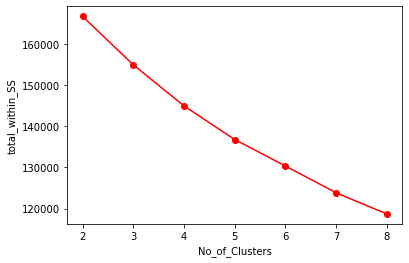

In [23]:
# Scree plot 
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [24]:
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
data['cluster'] = kmeans.fit_predict(data[numeric_columns])

In [25]:
# Find Similarity
similarity_matrix = cosine_similarity(data[numeric_columns])

In [26]:
# PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data[numeric_columns])
data['PC1'] = principal_components[:, 0]
data['PC2'] = principal_components[:, 1]

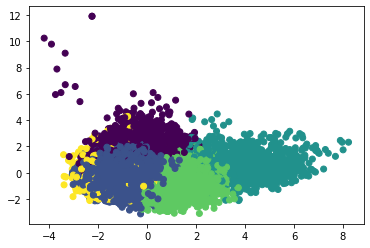

In [27]:
# Visualization of clustering and PCA results
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=data['cluster'])
plt.show()

In [28]:
def get_recommendations(artist_name):
    # Filter data for the given artist
    artist_data = data[data['artists'].str.contains(artist_name, case=False)]

    if artist_data.empty:
        return "No recommendations available for the given artist."

    # Find the mean popularity for each album
    album_popularity = artist_data.groupby('album_name')['popularity'].mean()

    # Find the most popular albums
    top_albums = album_popularity.nlargest(5).index.tolist()

    # Find the most similar albums
    artist_index = artist_data.index.tolist()[0]
    similarity_scores = similarity_matrix[artist_index]
    similar_albums_indices = np.argsort(similarity_scores)[::-1][1:6]
    similar_albums = data.loc[similar_albums_indices, 'album_name'].tolist()

    return top_albums ,similar_albums

In [29]:
artist_name = input('\nEnter artist name:  ')
top_albums , similar_albums = get_recommendations(artist_name)

print("\nTOP 5 ALBUMS: \n")
for album in top_albums:
    print(album)
    
print("\nSIMILAR ALBUMS: \n")
for album in similar_albums:
    print(album)


Enter artist name:  my little airport

TOP 5 ALBUMS: 

那陣時不知道
跟你開玩笑
SABINA之淚
你說之後會找我
適婚的年齡

SIMILAR ALBUMS: 

污糟兒
SABINA之淚
CSN
Chicago Bound
2 é Demais
